# Лабораторна робота №1 "Лінійна регресія"
### Виконала:
Студентка групи ДА-01 <br>
ННК «ІПСА» <br>
Борисенко Є.А. <br>
### Мета роботи:
навчитись реалізовувати лінійну регресію та градієнтний спуск.
### Завдання:
- Викачати дані з https://drive.google.com/drive/folders/17Xwk2quPb1gFmjG3KVIoZqChrWdcZ8XS?usp=sharing
- Реалізувати лінійну регресію, яка за допомогою даних з колонки “x” прогнозує значення в колонці “y” (перша колонка у файлах - просто індекс, не ознака, не потрібно її використовувати). Тренування алгоритму повинно відбуватись лише на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
- Візуалізувати дані з lab1_train.csv.
- Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
- Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab1_test.csv.
- Візуалізувати на одному графіку дані з lab1_train.csv,  lab1_test.csv та лінію, до якої зійшовся розв’язок.<br><br>
Існує багато способів підібрати ваги в лінійній регресії, але в даній лабораторній потрібно використати градієнтний спуск, а саме класичний (батчевий) градієнтний спуск, тобто одне оновлення ваг на одну епоху - не стохастичний і не мінібатчевий.
У лабораторній роботі можна використовувати лише стандартні засоби мови програмування Python, а також бібліотеки Numpy та Matplotlib. Заборонено використовувати pandas, sklearn та подібні.


### Хід роботи:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv

#### Функція для зчитування даних:

In [5]:
def read_csv(file_name):
    reader = csv.reader(open(file_name))
    next(reader)
    data = [row for row in reader]
    return data

#### Завантаження даних та візуалізація даних з датасету для тренування:

In [8]:
train_data = read_csv("lab_1_train.csv")
test_data = read_csv("lab_1_test.csv")

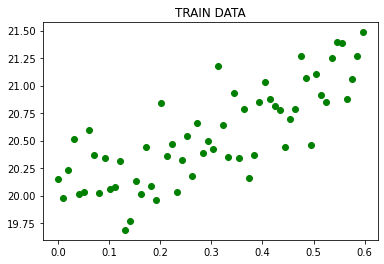

In [64]:
x = [float(row[1]) for row in train_data]
y = [float(row[2]) for row in train_data]
plt.title("TRAIN DATA")
plt.plot(x, y, 'go')

#### Реалізація лінійної регресії:

In [29]:
def regression_line(b0, b1, x):
    return b0 + np.multiply(b1, x)

def mse_loss_function(b0, b1, x, y):
    y_predicted = [regression_line(b0, b1, x_i) for x_i in x]
    result = np.square(np.subtract(np.array(y), np.array(y_predicted))).mean()
    return result

In [61]:
b0 = float(np.random.randn(1))
b1 = float(np.random.randn(1))

tolerance = 0.000001
alpha = 0.01

loss = mse_loss_function(b0, b1, x, y)
epoch = 0
delta = loss

while tolerance < delta:
    predicted_y = [regression_line(b0, b1, x_i) for x_i in x]
    difference = [(actual_y - predicted_y) for (actual_y, predicted_y) in zip(y, predicted_y)]
    
    b0_derivative = - 2 * np.array(difference).mean()
    b1_derivative = - 2 * np.array([(x_i * difference_i) for (x_i, difference_i) in zip (x, difference)]).mean()
      
    b0 -= np.multiply(alpha, b0_derivative)
    b1 -= np.multiply(alpha, b1_derivative)
    
    print(f'{epoch}: b0 = {b0}, b1 = {b1}, loss function = {loss}')
    
    delta = np.subtract (loss, mse_loss_function(b0, b1, x, y))
    loss = mse_loss_function(b0, b1, x, y)
    
    epoch += 1
    

0: b0 = -0.9064001457297195, b1 = 1.2237788978180064, loss function = 464.9724387191045
1: b0 = -0.484574106769231, b1 = 1.3499366087434783, loss function = 444.93349632825294
2: b0 = -0.07193643757225571, b1 = 1.4732791610221754, loss function = 425.75975119077873
3: b0 = 0.3317134064645737, b1 = 1.5938680358064372, loss function = 407.41384610826265
4: b0 = 0.72657159264973, b1 = 1.7117633722759293, loss function = 389.8600368807545
5: b0 = 1.1128300065403045, b1 = 1.8270239969289828, loss function = 373.0641226611829
6: b0 = 1.4906763454000846, b1 = 1.9397074522345907, loss function = 356.99337931690286
7: b0 = 1.8602942096177166, b1 = 2.0498700246590165, loss function = 341.61649566853816
8: b0 = 2.2218631921294767, b1 = 2.157566772080661, loss function = 326.90351248188716
9: b0 = 2.575558965890206, b1 = 2.262851550606546, loss function = 312.82576409401645
10: b0 = 2.921553369435011, b1 = 2.3657770408034717, loss function = 299.3558225598086
11: b0 = 3.2600144905734023, b1 = 2.46

879: b0 = 18.994251388985646, b1 = 5.128653231632939, loss function = 0.3777190938608025
880: b0 = 18.994792923949294, b1 = 5.126886839731988, loss function = 0.37737746647299564
881: b0 = 18.995334155195707, b1 = 5.125121438383147, loss function = 0.3770362221353716
882: b0 = 18.995875082895935, b1 = 5.1233570270311555, loss function = 0.3766953604184366
883: b0 = 18.996415707220923, b1 = 5.1215936051210615, loss function = 0.3763548808931747
884: b0 = 18.9969560283415, b1 = 5.119831172098219, loss function = 0.3760147831310542
885: b0 = 18.997496046428388, b1 = 5.118069727408287, loss function = 0.3756750667040222
886: b0 = 18.998035761652197, b1 = 5.116309270497232, loss function = 0.37533573118450664
887: b0 = 18.998575174183422, b1 = 5.114549800811326, loss function = 0.3749967761454142
888: b0 = 18.999114284192455, b1 = 5.112791317797147, loss function = 0.3746582011601306
889: b0 = 18.999653091849574, b1 = 5.11103382090158, loss function = 0.3743200058025194
890: b0 = 19.0001915

1619: b0 = 19.322313017335993, b1 = 4.058570678191868, loss function = 0.2058668745451712
1620: b0 = 19.322670579394554, b1 = 4.05740436985182, loss function = 0.20571793669719998
1621: b0 = 19.323027940938417, b1 = 4.056238715557586, loss function = 0.20556916584599827
1622: b0 = 19.323385102080024, b1 = 4.055073714942387, loss function = 0.20542056180431986
1623: b0 = 19.323742062931757, b1 = 4.053909367639651, loss function = 0.2052721243851302
1624: b0 = 19.324098823605937, b1 = 4.052745673283011, loss function = 0.20512385340160316
1625: b0 = 19.32445538421482, b1 = 4.0515826315063075, loss function = 0.20497574866712268
1626: b0 = 19.324811744870598, b1 = 4.050420241943583, loss function = 0.20482780999528108
1627: b0 = 19.3251679056854, b1 = 4.049258504229088, loss function = 0.2046800371998811
1628: b0 = 19.3255238667713, b1 = 4.048097417997277, loss function = 0.2045324300949337
1629: b0 = 19.325879628240294, b1 = 4.0469369828828095, loss function = 0.20438498849465797
1630: b

2301: b0 = 19.525002219144355, b1 = 3.3974320007347565, loss function = 0.13483864469956428
2302: b0 = 19.525246116557657, b1 = 3.396636447681972, loss function = 0.13476934735305895
2303: b0 = 19.52548987719745, b1 = 3.3958413407617627, loss function = 0.1347001277062998
2304: b0 = 19.525733501140436, b1 = 3.395046679723945, loss function = 0.13463098567216603
2305: b0 = 19.525976988463274, b1 = 3.394252464318475, loss function = 0.1345619211636338
2306: b0 = 19.526220339242577, b1 = 3.3934586942954508, loss function = 0.13449293409377816
2307: b0 = 19.526463553554915, b1 = 3.3926653694051088, loss function = 0.13442402437577033
2308: b0 = 19.526706631476817, b1 = 3.391872489397826, loss function = 0.1343551919228794
2309: b0 = 19.52694957308477, b1 = 3.3910800540241204, loss function = 0.13428643664847245
2310: b0 = 19.527192378455215, b1 = 3.3902880630346486, loss function = 0.13421775846601217
2311: b0 = 19.527435047664554, b1 = 3.3894965161802073, loss function = 0.134149157289059

3063: b0 = 19.676277651187277, b1 = 2.903996542997958, loss function = 0.09932243079057175
3064: b0 = 19.67643671591997, b1 = 2.9034777001288563, loss function = 0.09929295604829054
3065: b0 = 19.676595691451872, b1 = 2.902959148217981, loss function = 0.09926351435460502
3066: b0 = 19.676754577833012, b1 = 2.9024408871021676, loss function = 0.09923410567245977
3067: b0 = 19.67691337511338, b1 = 2.9019229166183433, loss function = 0.09920472996484006
3068: b0 = 19.677072083342942, b1 = 2.9014052366035266, loss function = 0.09917538719477324
3069: b0 = 19.677230702571638, b1 = 2.900887846894827, loss function = 0.09914607732532842
3070: b0 = 19.67738923284938, b1 = 2.900370747329447, loss function = 0.0991168003196153
3071: b0 = 19.677547674226044, b1 = 2.8998539377446777, loss function = 0.09908755614078572
3072: b0 = 19.67770602675149, b1 = 2.899337417977904, loss function = 0.09905834475203215
3073: b0 = 19.677864290475544, b1 = 2.8988211878666004, loss function = 0.0990291661165888

4216: b0 = 19.81136827846905, b1 = 2.4633532434976226, loss function = 0.0802457254235483
4217: b0 = 19.811451586683432, b1 = 2.46308150587082, loss function = 0.08023764046368248
4218: b0 = 19.81153484817999, b1 = 2.4628099206298417, loss function = 0.08022956456908913
4219: b0 = 19.81161806298492, b1 = 2.462538487689231, loss function = 0.08022149772960376
4220: b0 = 19.81170123112441, b1 = 2.4622672069635816, loss function = 0.08021343993507353
4221: b0 = 19.811784352624624, b1 = 2.461996078367533, loss function = 0.08020539117535647
4222: b0 = 19.81186742751172, b1 = 2.461725101815774, loss function = 0.08019735144032254
4223: b0 = 19.81195045581184, b1 = 2.4614542772230408, loss function = 0.0801893207198527
4224: b0 = 19.812033437551104, b1 = 2.4611836045041176, loss function = 0.08018129900383925
4225: b0 = 19.812116372755625, b1 = 2.4609130835738355, loss function = 0.08017328628218603
4226: b0 = 19.812199261451497, b1 = 2.4606427143470744, loss function = 0.08016528254480827
4

4933: b0 = 19.860562789121342, b1 = 2.3028888802230467, loss function = 0.07626083840226358
4934: b0 = 19.86061850989371, b1 = 2.3027071282726688, loss function = 0.07625722150251057
4935: b0 = 19.860674199418817, b1 = 2.3025254782456828, loss function = 0.07625360865821165
4936: b0 = 19.86072985771419, b1 = 2.3023439300849318, loss function = 0.07624999986481902
4937: b0 = 19.86078548479734, b1 = 2.3021624837332912, loss function = 0.0762463951177914
4938: b0 = 19.860841080685773, b1 = 2.301981139133668, loss function = 0.07624279441259116
4939: b0 = 19.86089664539698, b1 = 2.3017998962290016, loss function = 0.07623919774468664
4940: b0 = 19.860952178948445, b1 = 2.301618754962263, loss function = 0.07623560510955131
4941: b0 = 19.86100768135764, b1 = 2.3014377152764554, loss function = 0.0762320165026628
4942: b0 = 19.861063152642036, b1 = 2.301256777114614, loss function = 0.0762284319195048
4943: b0 = 19.86111859281908, b1 = 2.3010759404198056, loss function = 0.07622485135556557


#### Порахуємо функцію втрат на тестових даних 

In [62]:
test_x = [float(row[1]) for row in test_data]
test_y = [float(row[2]) for row in test_data]
mse_loss_function(b0, b1, test_x, test_y)

0.07538667071293823

#### Візуалізуємо результат

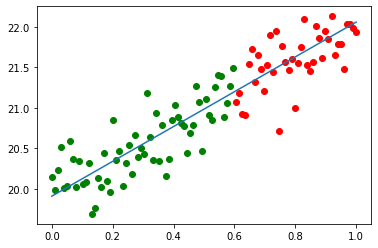

In [63]:
plt.plot(x, y, 'go', test_x, test_y, 'ro', [0, 1], [regression_line(b0, b1, 0), regression_line(b0, b1, 1)])